In [6]:
from numpy import *
import numpy as np

def loadDataSet(fileName, delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float,line)) for line in stringArr]
    return mat(datArr)

def pca(dataMat, topNfeat=9999999):
    meanVals = dataMat.mean(0)
    meanRemoved = dataMat - meanVals #remove mean
    covMat = cov(meanRemoved, rowvar=0)
    eigVals,eigVects = linalg.eig(mat(covMat))
    eigValInd = argsort(eigVals)            #sort, sort goes smallest to largest
    eigValInd = eigValInd[:-(topNfeat+1):-1]  #cut off unwanted dimensions
    redEigVects = eigVects[:,eigValInd]       #reorganize eig vects largest to smallest
    lowDDataMat = meanRemoved * redEigVects#transform data into new dimensions    
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat

In [8]:
dataMat = loadDataSet('testSet.txt')

In [9]:
dataMat

matrix([[10.235186, 11.321997],
        [10.122339, 11.810993],
        [ 9.190236,  8.904943],
        ...,
        [ 9.854922,  9.201393],
        [ 9.11458 ,  9.134215],
        [10.334899,  8.543604]])

In [10]:
dataMat.mean(0)

matrix([[9.06393644, 9.09600218]])

In [14]:
lowDMat, reconMat = pca(dataMat, 1)

In [15]:
lowDMat

matrix([[-2.51033597e+00],
        [-2.86915379e+00],
        [ 9.74108510e-02],
        [-7.67782222e-01],
        [ 1.02715333e+00],
        [-1.44409178e+00],
        [-2.17360352e+00],
        [-7.73998803e-01],
        [-1.09983463e+00],
        [-1.70275987e+00],
        [-5.39605615e-01],
        [-9.15572638e-01],
        [-2.42669452e+00],
        [ 2.93613464e+00],
        [ 3.92702506e-01],
        [ 2.59205734e+00],
        [ 4.96435625e-01],
        [-1.52069930e+00],
        [ 1.25471104e-01],
        [ 1.41846162e+00],
        [ 5.89902904e-01],
        [ 6.69601540e-01],
        [ 3.25466068e-01],
        [ 1.18812333e+00],
        [ 2.07790920e+00],
        [ 3.24938650e-01],
        [ 3.41109884e+00],
        [ 1.92249899e+00],
        [-6.57788287e-01],
        [-3.56836313e-01],
        [ 5.72240108e-02],
        [ 1.13444036e+00],
        [-2.47196176e-01],
        [ 1.14678135e+00],
        [ 1.62503940e+00],
        [-2.11489136e+00],
        [ 1.62262452e+00],
 

In [16]:
reconMat

matrix([[10.37044569, 11.23955536],
        [10.55719313, 11.54594665],
        [ 9.01323877,  9.01282393],
        ...,
        [ 9.32502753,  9.52436704],
        [ 9.0946364 ,  9.14637075],
        [ 9.16271152,  9.2580597 ]])

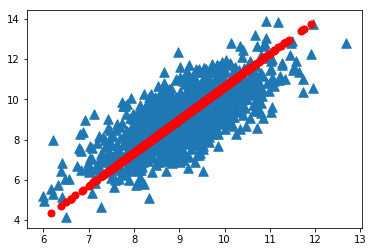

In [18]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0], marker='^', s=90)
ax.scatter(reconMat[:, 0].flatten().A[0], reconMat[:, 1].flatten().A[0], marker='o', s=50, c='red')
plt.show()

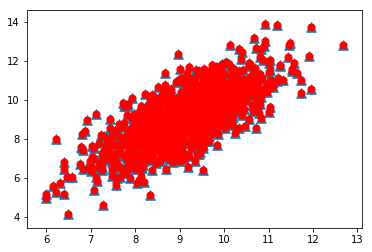

In [19]:
lowDMat, reconMat = pca(dataMat, 2)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0], marker='^', s=90)
ax.scatter(reconMat[:, 0].flatten().A[0], reconMat[:, 1].flatten().A[0], marker='o', s=50, c='red')
plt.show()

In [20]:
shape(lowDMat)

(1000L, 2L)

In [21]:
def replaceNanWithMean():
    datMat = loadDataSet('secom.data', ' ')
    numFeat = shape(datMat)[1]
    for i in range (numFeat):
        meanVal = mean(datMat[nonzero(~isnan(datMat[:,i].A))[0],i])
        datMat[nonzero(isnan(datMat[:,i].A))[0],i] = meanVal
    return datMat

In [24]:
dataMat = replaceNanWithMean()

In [25]:
dataMat

matrix([[3.03093000e+03, 2.56400000e+03, 2.18773330e+03, ...,
         1.64749042e-02, 5.28333333e-03, 9.96700663e+01],
        [3.09578000e+03, 2.46514000e+03, 2.23042220e+03, ...,
         2.01000000e-02, 6.00000000e-03, 2.08204500e+02],
        [2.93261000e+03, 2.55994000e+03, 2.18641110e+03, ...,
         4.84000000e-02, 1.48000000e-02, 8.28602000e+01],
        ...,
        [2.97881000e+03, 2.37978000e+03, 2.20630000e+03, ...,
         8.60000000e-03, 2.50000000e-03, 4.35231000e+01],
        [2.89492000e+03, 2.53201000e+03, 2.17703330e+03, ...,
         2.45000000e-02, 7.50000000e-03, 9.34941000e+01],
        [2.94492000e+03, 2.45076000e+03, 2.19544440e+03, ...,
         1.62000000e-02, 4.50000000e-03, 1.37784400e+02]])

In [27]:
meanVals = mean(dataMat, 0)

In [28]:
meanVals

matrix([[ 3.01445290e+03,  2.49585023e+03,  2.20054732e+03,
          1.39637663e+03,  4.19701314e+00,  1.00000000e+02,
          1.01112908e+02,  1.21821502e-01,  1.46286166e+00,
         -8.41022364e-04,  1.45750799e-04,  9.64352780e-01,
          1.99956809e+02,  0.00000000e+00,  9.00537052e+00,
          4.13086035e+02,  9.90760281e+00,  9.71443926e-01,
          1.90047354e+02,  1.24810340e+01,  1.40505424e+00,
         -5.61839361e+03,  2.69937843e+03, -3.80629973e+03,
         -2.98598136e+02,  1.20384473e+00,  1.93847681e+00,
          6.63862799e+00,  6.94995323e+01,  2.36619744e+00,
          1.84158914e-01,  3.67318939e+00,  8.53374687e+01,
          8.96027854e+00,  5.05826386e+01,  6.45557870e+01,
          4.94173705e+01,  6.62212736e+01,  8.68365766e+01,
          1.18679554e+02,  6.79049093e+01,  3.35306617e+00,
          7.00000000e+01,  3.55538904e+02,  1.00311650e+01,
          1.36743060e+02,  7.33672811e+02,  1.17795811e+00,
          1.39972231e+02,  1.00000000e+0

In [30]:
meanRemoved = dataMat - meanVals

In [31]:
meanRemoved

matrix([[ 1.64771044e+01,  6.81497692e+01, -1.28140177e+01, ...,
          2.77555756e-17,  1.99493200e-17,  1.70530257e-13],
        [ 8.13271044e+01, -3.07102308e+01,  2.98748823e+01, ...,
          3.62509579e-03,  7.16666667e-04,  1.08534434e+02],
        [-8.18428956e+01,  6.40897692e+01, -1.41362177e+01, ...,
          3.19250958e-02,  9.51666667e-03, -1.68098663e+01],
        ...,
        [-3.56428956e+01, -1.16070231e+02,  5.75268229e+00, ...,
         -7.87490421e-03, -2.78333333e-03, -5.61469663e+01],
        [-1.19532896e+02,  3.61597692e+01, -2.35140177e+01, ...,
          8.02509579e-03,  2.21666667e-03, -6.17596635e+00],
        [-6.95328956e+01, -4.50902308e+01, -5.10291771e+00, ...,
         -2.74904215e-04, -7.83333333e-04,  3.81143337e+01]])

In [32]:
covMat = cov(meanRemoved, rowvar = 0)

In [33]:
covMat

array([[ 5.39940056e+03, -8.47962623e+02,  1.02671010e+01, ...,
        -1.67440688e-02, -5.93197815e-03,  2.87879850e+01],
       [-8.47962623e+02,  6.43649877e+03,  1.35942679e+01, ...,
         1.21967287e-02,  2.32652705e-03,  3.37335304e+02],
       [ 1.02671010e+01,  1.35942679e+01,  8.63239193e+02, ...,
        -7.59126039e-03, -2.59521865e-03, -9.07023669e+01],
       ...,
       [-1.67440688e-02,  1.21967287e-02, -7.59126039e-03, ...,
         7.75231441e-05,  2.45865358e-05,  3.22979001e-01],
       [-5.93197815e-03,  2.32652705e-03, -2.59521865e-03, ...,
         2.45865358e-05,  8.21484994e-06,  1.04706789e-01],
       [ 2.87879850e+01,  3.37335304e+02, -9.07023669e+01, ...,
         3.22979001e-01,  1.04706789e-01,  8.81006310e+03]])

In [37]:
eigVals, eigVects = linalg.eig(mat(covMat))

In [39]:
eigVals

array([ 5.34151979e+07,  2.17466719e+07,  8.24837662e+06,  2.07388086e+06,
        1.31540439e+06,  4.67693557e+05,  2.90863555e+05,  2.83668601e+05,
        2.37155830e+05,  2.08513836e+05,  1.96098849e+05,  1.86856549e+05,
        1.52422354e+05,  1.13215032e+05,  1.08493848e+05,  1.02849533e+05,
        1.00166164e+05,  8.33473762e+04,  8.15850591e+04,  7.76560524e+04,
        6.66060410e+04,  6.52620058e+04,  5.96776503e+04,  5.16269933e+04,
        5.03324580e+04,  4.54661746e+04,  4.41914029e+04,  4.15532551e+04,
        3.55294040e+04,  3.31436743e+04,  2.67385181e+04,  1.47123429e+04,
        1.44089194e+04,  1.09321187e+04,  1.04841308e+04,  9.48876548e+03,
        8.34665462e+03,  7.22765535e+03,  5.34196392e+03,  4.95614671e+03,
        4.23060022e+03,  4.10673182e+03,  3.41199406e+03,  3.24193522e+03,
        2.74523635e+03,  2.35027999e+03,  2.16835314e+03,  1.86414157e+03,
        1.76741826e+03,  1.70492093e+03,  1.66199683e+03,  1.53948465e+03,
        1.33096008e+03,  

In [40]:
len(eigVals)

590

In [41]:
eigVects

matrix([[-6.39070760e-04, -1.20314234e-04,  1.22460363e-04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 2.35722934e-05, -6.60163227e-04,  1.71369126e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 2.36801459e-04,  1.58026311e-04,  3.28185512e-04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 2.61329351e-08, -6.06233975e-09,  1.09328336e-09, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 5.62597732e-09,  5.96647587e-09,  8.83024927e-09, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 3.89298443e-04, -2.32070657e-04,  7.13534990e-04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [42]:
len(eigVals)

590